<a href="https://colab.research.google.com/github/biplapkc/Leaflet-Project/blob/master/Biplap13_Lab03_1%262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CONVERT RGB TO GRAYSCALE


RGB TO HSV And Binarize

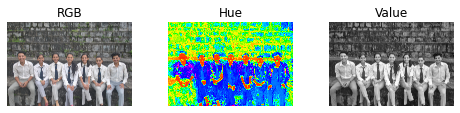

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv
from mpl_toolkits.axes_grid1 import ImageGrid

#changing Image to HSV
rgb_img = plt.imread('beep.JPG')
hsv_img = rgb2hsv(rgb_img)

#Extracting Hue and Value Channels 
hue_img = hsv_img[:, :, 0]

value_img = hsv_img[:, :, 2]

fig = plt.figure(figsize=(8,4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 3),
                 axes_pad=0.5
                 )
imlist = [rgb_img, hue_img,value_img]
tlist = ['RGB',
         'Hue',
         "Value"]
cmap_list = [None,'hsv','gray']

for i in range(3):
    grid[i].imshow(imlist[i],cmap=cmap_list[i])
    grid[i].set_title(tlist[i]) 
    grid[i].axis('off')
plt.savefig('beep1_rgb2hsv.jpg',dpi=200)

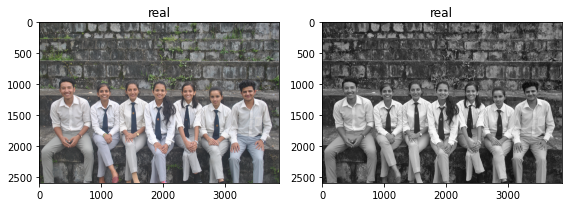

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray

#changing image to grayscale
real = plt.imread('beep.JPG')
grayscale = rgb2gray(real)


# Displaying Image
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(real)
# 
ax[0].set_title("real")
# 
ax[1].imshow(grayscale, cmap=plt.cm.gray)
# 
ax[1].set_title("real")
# plt.savefig('test_gray.JPG',dpi=150)

fig.tight_layout()
plt.show()


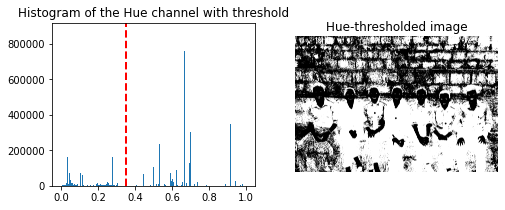

In [5]:
#Binarization

hue_threshold = 0.35
binary_img = hue_img > hue_threshold

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 3))

ax0.hist(hue_img.ravel(), 512)
ax0.set_title("Histogram of the Hue channel with threshold")
ax0.axvline(x=hue_threshold, color='r', linestyle='dashed', linewidth=2)
ax1.imshow(binary_img,cmap='gray')
ax1.set_title("Hue-thresholded image")
ax1.axis('off')
plt.savefig('test_threshold.jpg',dpi=200)

Getting used to with **SciPy, ndimage measurements and morphology**

In [7]:
# Module import
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import measurements,morphology

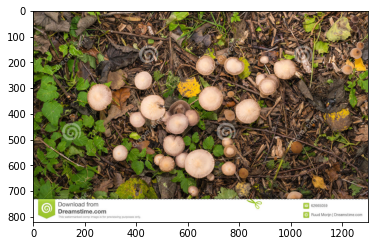

In [8]:
# Load Image
im = Image.open('mushrooms.jpg')#.convert('L')
# im = np.array(im)
plt.imshow(im)

In [9]:
im = Image.open('mushrooms.jpg').convert('L')
im = np.array(im)
im.shape, im.size

((820, 1300), 1066000)

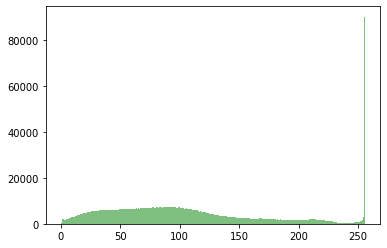

In [12]:
#Histogram of image 
fig, ax = plt.subplots()
ax.hist(im.ravel(), bins=256, range=(0.0, 256.0), fc='green',alpha=0.5)
plt.savefig('RB_grayscale_histogram.jpg')
plt.show()

In [13]:
#binarization
im2 = (im>150)
im2, im2.sum(), im2.size

(array([[False, False, False, ..., False, False,  True],
        [False, False, False, ..., False, False,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]), 254631, 1066000)

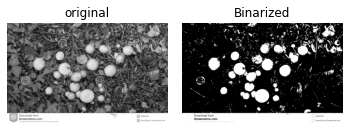

In [14]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure()
plt.gray()
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(1, 2),
                 axes_pad=0.2
                 )
ilist = [im, im2]
tlist = ['original','Binarized']
for i in range(2):
    grid[i].imshow(ilist[i])
    grid[i].set_title(tlist[i])
    grid[i].axis('off')
plt.show()

In [15]:
labels_bi, nbr_objects_bi = measurements.label(im2)
print("Number of mushrooms:", nbr_objects_bi)

Number of mushrooms: 4336


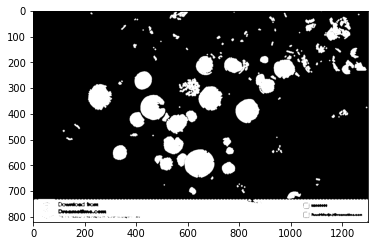

In [16]:
#4336 ins not tru so removing small areas
open_img = morphology.binary_opening(im2, iterations=3)
plt.imshow(open_img)

In [17]:
labels_op, nbr_objects_op = measurements.label(open_img)
print("Number of mushrooms:", nbr_objects_op)

Number of objects: 138


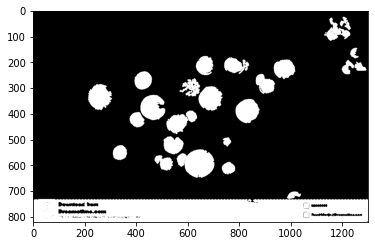

In [18]:
#138 is still not accurate, removal of small area with mask 
areas = np.array(measurements.sum(open_img, labels_op, np.arange(labels_op.max()+1)))
mask = areas > 755
remove_small_gomi = mask[labels_op]
plt.imshow(remove_small_gomi)

In [19]:
labels_rsg, nbr_objects_rsg = measurements.label(remove_small_gomi)
print("Number of mushrooms:", nbr_objects_rsg)

Number of objects: 26


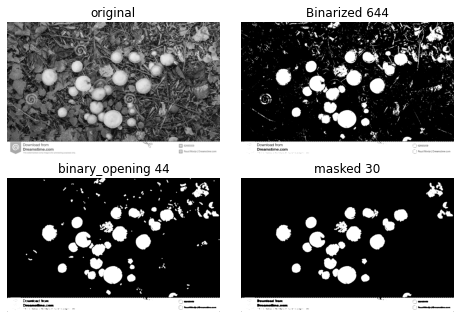

In [20]:
#summarizing all above binarization steps 
fig = plt.figure(figsize=(8,6))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2, 2),
                 axes_pad=0.3
                 )
imlist = [im, im2, open_img, remove_small_gomi]
tlist = ['original', 'Binarized 644', 'binary_opening 44', 'masked 30']
for i in range(4):
    grid[i].imshow(imlist[i])
    grid[i].set_title(tlist[i])
    grid[i].axis('off')
    plt.gray()
plt.show()

**labeled Image**

Display a labeled image with 26 last white areas





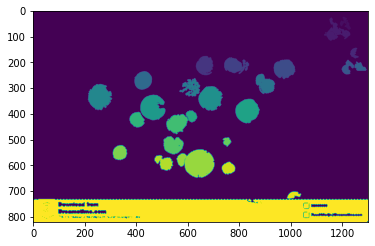

In [21]:
plt.imshow(labels_rsg, cmap='viridis')
plt.savefig('RB_viridis.jpg')

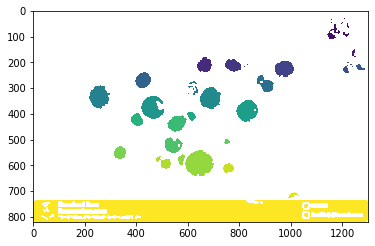

In [22]:
labels_rsg = labels_rsg.astype(float)
labels_rsg[labels_rsg==0] = np.nan
plt.imshow(labels_rsg, cmap='viridis')

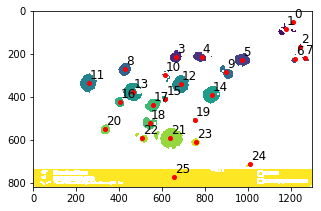

In [23]:
point = measurements.center_of_mass(remove_small_gomi,labels_rsg,range(1, nbr_objects_rsg + 1))
plt.figure(figsize=(5,5))
plt.subplot(111)
plt.plot(np.array(point)[:,1],np.array(point)[:,0],'ro',ms=4)
[plt.text(np.array(point)[i,1]+5,np.array(point)[i,0]-20,i, fontsize=12) for i in range(len(point))]
plt.imshow(labels_rsg, cmap=plt.cm.viridis)

Sizes of labeled area

In [24]:
sizes = measurements.sum(remove_small_gomi, labels_rsg, range(1,nbr_objects_rsg + 1))
sizes

array([   961.,   3612.,    777.,   3797.,   4004.,   4742.,   1409.,
         1026.,   3732.,   3779.,   3072.,   6680.,   6552.,   7051.,
         6463.,   1387.,   2519.,   4512.,   4066.,    767.,   2505.,
        11222.,   2670.,   1846.,    974., 107916.])

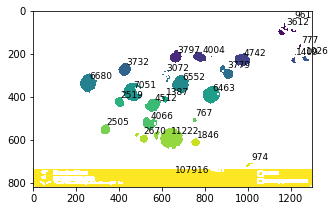

In [25]:
plt.figure(figsize=(5,5))
plt.subplot(111)
[plt.text(np.array(point)[i,1]+5,np.array(point)[i,0]-20,str(sizes[i])[:-2], fontsize=9) for i in range(len(point))]
plt.imshow(labels_rsg, cmap=plt.cm.viridis)

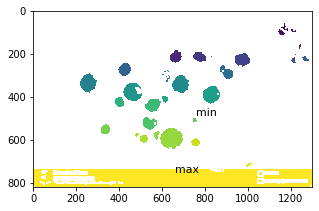

In [26]:
#The largest and smallest sizes can be found with the following code.


s_max_ind = np.argmax(sizes)
s_max_ind
#19
s_min_ind = np.argmin(sizes)
s_min_ind
#20

plt.figure(figsize=(5,5))
plt.subplot(111)
plt.text(np.array(point)[s_max_ind,1]+5,np.array(point)[s_max_ind,0]-20,'max', fontsize=11)
plt.text(np.array(point)[s_min_ind,1]+5,np.array(point)[s_min_ind,0]-20,'min', fontsize=11)
plt.imshow(labels_rsg, cmap=plt.cm.viridis)